# GPU CONFIGURATION

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Reduce TensorFlow logging
import tensorflow as tf
from tensorflow import keras

# Initialize TensorFlow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
        
# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configure GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
        
print("====================================================================")     
print("||                     DRIVERS AND GPU INFO                       ||")       
print("====================================================================")      
print("")

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs
||                     DRIVERS AND GPU INFO                       ||

Fri May 23 10:22:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 570.133.07     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     Off |   00000000:01:00.0 Off |                  N/A |
|  0%   38C    P8              9W /  165W |     126MiB /  16380MiB |      0%      Default |
|              

# SYSTEM PARAMETERS

In [18]:
import psutil

def get_ram_usage():
    return psutil.virtual_memory().used / (1024 ** 3) 

ram_usage_gb = get_ram_usage()
print(f"RAM Usage: {ram_usage_gb:.2f} GB")

# Get memory usage information
memory = psutil.virtual_memory()

# Total RAM in bytes
total_memory = memory.total

# RAM used in bytes
used_memory = memory.used

# RAM free in bytes
free_memory = memory.available

# RAM usage percentage
memory_percentage = memory.percent

print(f"Total Memory: {total_memory / (1024 ** 3)} GB")
print(f"Used Memory: {used_memory / (1024 ** 3)} GB")
print(f"Free Memory: {free_memory / (1024 ** 3)} GB")
print(f"Memory Usage: {memory_percentage}%")

print("")
print("====================================================================")
print("||                     SYSTEM INFO                                 ||")
print("====================================================================")
print("")

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

RAM Usage: 4.07 GB
Total Memory: 31.198062896728516 GB
Used Memory: 4.074592590332031 GB
Free Memory: 26.66429901123047 GB
Memory Usage: 14.5%

||                     SYSTEM INFO                                 ||

Your runtime has 33.5 gigabytes of available RAM

You are using a high-RAM runtime!


# VERIFICATION

In [19]:
import os
HOME = os.getcwd()
print("Working at: ", HOME)

Working at:  /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model


In [20]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.11.2 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15956MiB)
Setup complete ✅ (12 CPUs, 31.2 GB RAM, 76.8/226.7 GB disk)


# 1. Creation of the first model

In [21]:
# Libraries for phase 1

from ultralytics import YOLO
from IPython.display import display, Image

# 1.1
import matplotlib.pyplot as plt
import numpy as np

# 1.2
import os
from skimage import exposure
from PIL import Image

In [22]:
model = YOLO('yolov8n.yaml') 

results = model.predict(
    source='data/yolo_train_dataset/train/images',
    iou=0.7,
    conf=0.5,
    save=True,
    device=0
)


image 1/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.jpg: 640x640 (no detections), 5.0ms
image 2/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.jpg: 640x640 (no detections), 5.0ms
image 3/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.jpg: 640x640 (no detections), 4.9ms
image 4/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.jpg: 640x640 (no detections), 5.0ms
image 5/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data

## 1.1 Data preparation

In [23]:
cls=[]
for result in results :
    boxes =result.boxes
    classes=boxes.cls
    cls.append(classes)

for i in range(len(cls)):
    cls[i]=cls[i].cpu().numpy()
  
box=[]

for result in results :
    boxes =result.boxes
    boxes=boxes.xywh
    box.append(boxes)

for i in range(len(box)):
    box[i]=box[i].cpu().numpy()

box[0]


array([], shape=(0, 4), dtype=float32)

In [24]:

# ==========================================================
#                 Convert to binary masks
# ==========================================================

bin_masks=[]
for j in range(len(box)):
   boxes1 = box[j]
   classes1=cls[j]
   boxes1_list=boxes1.tolist()
   classes1_list=classes1.tolist()
   binary_map = np.zeros((32,640,640), dtype=np.uint8)
   for box1, class1 in zip(boxes1_list,classes1_list):
       x,y,w,h=box1
       x1, y1 = round(x), round(y)
       x2, y2 = round(x+w), round(y+h)
       binary_map[int(class1), y1:y2, x1:x2] = 1

   bin_masks.append(binary_map)

del results, cls, box
bin_masks[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:

# ==========================================================
#                 Convert to bounding boxes
# ==========================================================

def remove_nan(bb):
    bb=np.nan_to_num(bb, nan=0)
    return bb

bin_masks = list(map(remove_nan, bin_masks))

## 1.2 Pairing images with masks

In [26]:
images_folder = 'data/yolo_train_dataset/train/images'
labels_folder = 'data/yolo_train_dataset/train/labels'

image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]
label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]

image_files.sort()
label_files.sort()

image_label_pairs = []

for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(labels_folder, label_file)

    if os.path.isfile(label_path):
        image_label_pairs.append((image_path, label_path))

for image_path, label_path in image_label_pairs:
    print("Image:", image_path)
    print("Label:", label_path)
    print()

del image_files, label_files

Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.txt

Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.txt

Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.txt

Image: data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.txt

Image: data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.4b952e7932d0d8febfddcee089168d68.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00005_jpg.rf.4b952e7932d0d8febfddcee089168d68.

In [27]:
def apply_clahe(image, clip_limit=0.02):
    image_float = image.astype(float) / 255.0
    image_clahe = exposure.equalize_adapthist(image_float, clip_limit=clip_limit)
    image_clahe = (image_clahe * 255).astype(image.dtype)

    return image_clahe

In [28]:
image_data = []
mask_data = []  # bounding boxes (class_id, x_center, y_center, width, height)

for img_file, label_file in image_label_pairs:
    # Load image
    img = Image.open(img_file)
    img_data = np.array(img, dtype=np.float16)
    # Apply CLAHE if desired, otherwise comment out the following line
    img_data = apply_clahe(img_data)
    image_data.append(img_data)

    # Load bounding boxes from .txt
    with open(label_file, 'r') as f:
        bboxes = []
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                bboxes.append((int(class_id), x_center, y_center, width, height))
        mask_data.append(bboxes)

In [29]:
# ===========================================================
#                 check the paired data
# ===========================================================

dataset= list(zip(image_data,mask_data,bin_masks))

print("Images:", len(image_data))
print("Masks:", len(mask_data))
print("Bin Masks:", len(bin_masks))

Images: 894
Masks: 894
Bin Masks: 894


# 2. Preparation of the dataset

In [30]:
# Libraries for phase 2

import cv2
import numpy as np

# 2.1
import random

In [31]:
def resize_img(input_image, input_mask, input_bb):
    input_image = cv2.resize(input_image, (512, 512), interpolation=cv2.INTER_NEAREST)

    # input_bb
    if input_bb.ndim == 3:
        input_bb = np.transpose(input_bb, axes=[1, 2, 0])
    input_bb = cv2.resize(input_bb, (512, 512), interpolation=cv2.INTER_NEAREST)

    # input_mask
    if input_mask.ndim == 3:
        input_mask = np.transpose(input_mask, axes=[1, 2, 0])
    input_mask = cv2.resize(input_mask, (512, 512), interpolation=cv2.INTER_NEAREST)

    return input_image, input_mask, input_bb

def augment(input_image,input_mask,input_bb):
    if np.random.uniform() > 0.5:
        input_image = np.fliplr(input_image)
        input_mask = np.fliplr(input_mask)
        input_bb = np.fliplr(input_bb)
        
    return input_image,input_mask,input_bb

def normalize(image_data):
    image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
    return image_data

def load_image_train(datapoint):
    input_image = np.array(datapoint[0])
    input_mask = np.array(datapoint[1])
    input_bb = np.array(datapoint[2])
    input_image, input_mask, input_bb = resize_img(input_image, input_mask, input_bb)
    input_image = normalize(input_image)
    input_image, input_mask, input_bb = augment(input_image, input_mask, input_bb)


    return input_image, input_mask, input_bb

In [32]:
new_dataset=list(map(load_image_train, dataset))

## 2.1 Divide by category (80% train, 20% test)

In [33]:
# Define the dataset and categories
dataset = new_dataset
categories = [24, 72, 15, 32, 37, 30, 33, 140, 7, 35]

# Initialize the test and train datasets
test_dataset = []
train_dataset = []

# Set the random seed for reproducibility
random.seed(42)
start_idx = 0

print("Dataset length: ", len(dataset))

# Loop through each category
for i, category_count in enumerate(categories):
    end_idx = start_idx + category_count
    
    # Slice de la categoría
    category_data = dataset[start_idx:end_idx]
    
    # Shuffle dentro de esa categoría
    random.shuffle(category_data)
    
    # 20% para test
    num_test = int(0.2 * category_count)
    
    test_images = category_data[:num_test]
    train_images = category_data[num_test:]
    
    test_dataset.extend(test_images)
    train_dataset.extend(train_images)
    
    print(f'Category {i + 1}: {num_test} images in the test dataset')
    
    start_idx = end_idx

print(len(train_dataset))

Dataset length:  894
Category 1: 4 images in the test dataset
Category 2: 14 images in the test dataset
Category 3: 3 images in the test dataset
Category 4: 6 images in the test dataset
Category 5: 7 images in the test dataset
Category 6: 6 images in the test dataset
Category 7: 6 images in the test dataset
Category 8: 28 images in the test dataset
Category 9: 1 images in the test dataset
Category 10: 7 images in the test dataset
343


# 3. Visualize masks

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

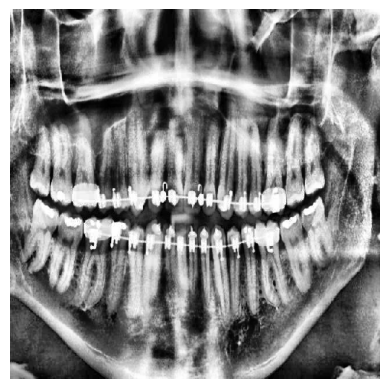

In [35]:
obj=train_dataset[10]
image=obj[0]
mask=obj[1]
bb=obj[2]

pil_image = tf.keras.preprocessing.image.array_to_img(image)
plt.imshow(pil_image)
plt.axis('off')

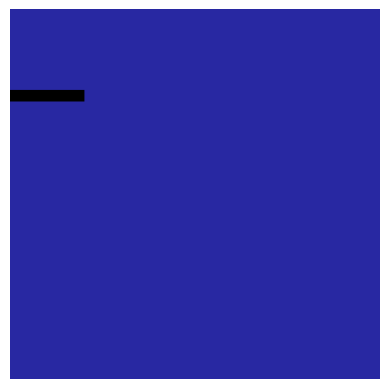

In [36]:
if mask.ndim == 2:
    mask = mask[..., np.newaxis]  # Convertir a (512, 512, 1)

colormap = ListedColormap(['#000000'] * 32)

combined_image = np.zeros((512,512, 3), dtype=np.uint16)

for i in range(mask.shape[2]):
    image = mask[:,:,i]

    if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
      colormap.colors[i] = '#2828a2'
    elif i == 2 or i == 10 or i == 18 or i == 26:
      colormap.colors[i] = '#09c5c5'
    elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
      colormap.colors[i] = '#1caf1c'
    elif i == 5 or i == 6 or i == 7:
      colormap.colors[i] = '#eeee25'
    elif i == 13 or i == 14 or i == 15:
      colormap.colors[i] = '#eeee25'
    elif i == 21 or i == 22 or i == 23:
      colormap.colors[i] = '#eeee25'
    elif i == 29 or i == 30 or i == 31:
      colormap.colors[i] = '#eeee25'

    hex_color = colormap.colors[i]
    rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

    mask_new = np.where(image > 0, 1, 0)

    rgb_color_tiled = np.tile(rgb_color, (512, 512, 1))

    colored_image = mask_new[:, :, np.newaxis] * rgb_color_tiled

    combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()

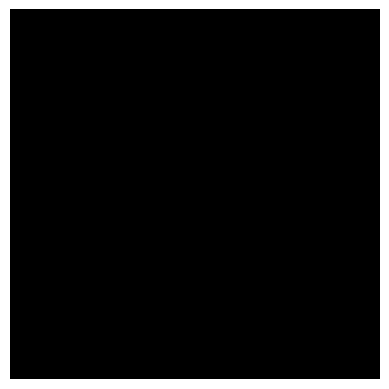

In [37]:
colormap = ListedColormap(['#000000'] * 32)

combined_image = np.zeros((512,512, 3), dtype=np.uint16)

for i in range(bb.shape[2]):
    image = bb[:,:,i]

    if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
      colormap.colors[i] = '#2828a2'
    elif i == 2 or i == 10 or i == 18 or i == 26:
      colormap.colors[i] = '#09c5c5'
    elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
      colormap.colors[i] = '#1caf1c'
    elif i == 5 or i == 6 or i == 7:
      colormap.colors[i] = '#eeee25'
    elif i == 13 or i == 14 or i == 15:
      colormap.colors[i] = '#eeee25'
    elif i == 21 or i == 22 or i == 23:
      colormap.colors[i] = '#eeee25'
    elif i == 29 or i == 30 or i == 31:
      colormap.colors[i] = '#eeee25'

    hex_color = colormap.colors[i]
    rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

    mask_new = np.where(image > 0, 1, 0)

    rgb_color_tiled = np.tile(rgb_color, (512,512, 1))

    colored_image = mask_new[:, :, np.newaxis] * rgb_color_tiled

    combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()